In [1]:
'''
scipy 패키지의 확률분포 검정
 1. 정규분포 검정 
    - 연속확률분포 : 정규분포, 균등분포, 카이제곱, T/Z/F분포 
 2. 이항분포 검정(binominal test)
    - 이산확률분포 : 베루누이분포, 이항분포, 포아송분포
 3. 카이제곱 검정(chisquare test) 
'''

from scipy import stats # 확률분포 검정 
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
# 차트에서 한글 지원 
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [3]:
# 음수 부호 지원 
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False
import pandas as pd

In [4]:
# 1. 정규분포 검정 : 연속확률 분포, 평균 중심 좌우 대칭성 검정  
mu = 0; std = 1; N = 1000
std_norm = stats.norm(mu, std) # 표준 정규분포
print(std_norm) # object info 

In [5]:
# 1) 정규분포확률변수 
std_norm_data = std_norm.rvs(N) # 시뮬레이션 : 모집단 -> 1000개 sampling

In [6]:
# 분포곡선 vector data
x = np.linspace(min(std_norm_data), max(std_norm_data), 100)
x # 100개 vector data 생성 

array([-2.84762292, -2.78852279, -2.72942267, -2.67032254, -2.61122241,
       -2.55212228, -2.49302216, -2.43392203, -2.3748219 , -2.31572177,
       -2.25662164, -2.19752152, -2.13842139, -2.07932126, -2.02022113,
       -1.96112101, -1.90202088, -1.84292075, -1.78382062, -1.7247205 ,
       -1.66562037, -1.60652024, -1.54742011, -1.48831999, -1.42921986,
       -1.37011973, -1.3110196 , -1.25191948, -1.19281935, -1.13371922,
       -1.07461909, -1.01551897, -0.95641884, -0.89731871, -0.83821858,
       -0.77911846, -0.72001833, -0.6609182 , -0.60181807, -0.54271794,
       -0.48361782, -0.42451769, -0.36541756, -0.30631743, -0.24721731,
       -0.18811718, -0.12901705, -0.06991692, -0.0108168 ,  0.04828333,
        0.10738346,  0.16648359,  0.22558371,  0.28468384,  0.34378397,
        0.4028841 ,  0.46198422,  0.52108435,  0.58018448,  0.63928461,
        0.69838473,  0.75748486,  0.81658499,  0.87568512,  0.93478524,
        0.99388537,  1.0529855 ,  1.11208563,  1.17118575,  1.23

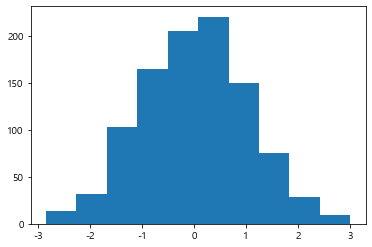

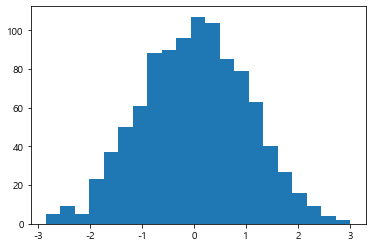

In [8]:
# 2) 히스토그램 : 확률밀도분포 곡선 시각화 
plt.hist(std_norm_data) # y축 : 빈도수 기준   
plt.show()

plt.hist(std_norm_data, bins="auto") # y축 : 밀도 기준   
plt.show()

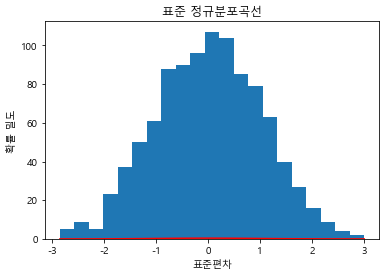

In [10]:
# 3) 정규분포곡선 : 확률밀도분포
from scipy.stats import norm # 확률 밀도(density) 함수

plt.hist(std_norm_data, bins="auto") # y축 : 밀도 기준
plt.plot(x, norm.pdf(x, mu, std), color='red') 
plt.xlabel("표준편차") 
plt.ylabel("확률 밀도")
plt.title("표준 정규분포곡선")
plt.show() # 평균 0 기준으로 -3 ~ +3 편차 

In [11]:
# 4) 정규성 검정 
# 귀무가설 : 정규분포와 차이가 없다.
test_stat, pvalue = stats.shapiro(std_norm_data) # sample data 
print("test_stat = %.5f, pvalue = %.5f"%(test_stat, pvalue))
if pvalue >= 0.05 :
    print('정규분포와 차이가 없다.')
else :
    print('정규분포와 차이가 있다.') 

test_stat = 0.99823, pvalue = 0.39313
정규분포와 차이가 없다.


In [12]:
# 2. 이항 검정(binominal test) : 이항분포(2가지 범주)를 이용한 가설검정
# - 베르누이 분포 : 이항변수(성공 or실패)에서 성공(1)이 나올 확률분포(모수 : 성공)
# - 이항분포 : 베르누이 분포에서 시행횟수 n을 적용한 확률분포(모수 : N(시행횟수), P)
  
# ex) 게임에 이길 확률 : 50%, 시행횟수 : 100, 성공횟수 : ?  

N = 100 # 시행횟수
P = 0.5 # 모수 성공확률(이길 확률)
#np.random.seed(0)

# 1) 베르누이 분포 -> 이항분포 
x = stats.bernoulli(P).rvs(N) # rvs(N) : 성공확률,시행횟수 : N번 시뮬레이션
print('x=', x) # x= [1 1 1 1 0 1 0 1 1 0] -> 성공(1), 실패(0)

x= [0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 1 1 0 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1
 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 1 1 1 0 1 1 0 1 0 1 1 0 1 1 1 0 1 0 0 1 1 0
 0 0 1 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0]


In [13]:
# 2) 이항분포에서 성공 횟수 반환(1인 경우 반환) 
x = np.count_nonzero(x)  
print('n=',x) # 성공횟수 : n= 47 ~ 53(편차 : 3)

n= 44


In [14]:
# 3) 이항검정 : 이항분포 이용 가설검정 : 베르누이 확률 분포의 모수(P)에 대한 가설 검정  

# [귀무가설] : 게임에 이길 확률 P = 0.5 다르지 않다. - default

# (1) 유의확률
help(stats.binom_test)
'''
binom_test(x, n=None, p=0.5, alternative='two-sided')
 x : 성공횟수, n : 시행횟수, p : 귀무가설 확률(0.5), alternative='two-sided' : 양측검정 
''' 
#print('## 유의확률 ##')
pvalue = stats.binom_test(x=x, n=N, p=0.5, alternative='two-sided') # 성공횟수, 시행횟수 
print('x = %d, pvalue= %.5f'%(x, pvalue)) 

Help on function binom_test in module scipy.stats.morestats:

binom_test(x, n=None, p=0.5, alternative='two-sided')
    Perform a test that the probability of success is p.
    
    This is an exact, two-sided test of the null hypothesis
    that the probability of success in a Bernoulli experiment
    is `p`.
    
    Parameters
    ----------
    x : int or array_like
        The number of successes, or if x has length 2, it is the
        number of successes and the number of failures.
    n : int
        The number of trials.  This is ignored if x gives both the
        number of successes and failures.
    p : float, optional
        The hypothesized probability of success.  ``0 <= p <= 1``. The
        default value is ``p = 0.5``.
    alternative : {'two-sided', 'greater', 'less'}, optional
        Indicates the alternative hypothesis. The default value is
        'two-sided'.
    
    Returns
    -------
    p-value : float
        The p-value of the hypothesis test.
    
    R

In [16]:
# (2) 이항검정 : 유의확률 vs 유의수준 
print('## 이항 검정 ##')
if pvalue > 0.05 : # 유의확률 > 유의수준 
    print(f"p-value({pvalue}) >= 0.05 : 기존 성공률 50%와 다르다고 할 수 없다.")
else:
    print(f"p-value({pvalue}) < 0.05 이므로 기존 성공률 50%와 다르다고 할 수 있다.")
'''
[해설] 시행횟수 100회, 성공횟수 51회 일때 유의확률 : 92%
       이때 유의확률은 게임에 이길 확률 50% 가정하에 나온 확률이다.
       따라서 모집단의 확률모수(P)는 0.5와 차이가 없다고 볼 수 있다.(귀무가설 채택) 
'''

## 이항 검정 ##
p-value(0.2712530240738342) >= 0.05 : 기존 성공률 50%와 다르다고 할 수 없다.


'\n[해설] 시행횟수 100회, 성공횟수 51회 일때 유의확률 : 92%\n       이때 유의확률은 게임에 이길 확률 50% 가정하에 나온 확률이다.\n       따라서 모집단의 확률모수(P)는 0.5와 차이가 없다고 볼 수 있다.(귀무가설 채택) \n'

In [17]:
# [이항검정 적용] 
# 100명의 응시자 중에서 45명이 남자라고 가정할 때 
# 남자가 여자 보다 합격률이 높다고 할수 있는가?

# 귀무가설 : 남여 합격률에 차이가 없다.(P=0.5)

print('귀무가설 : 남여 합격률에 차이가 없다. p=0.3')
print('## 유의확률 ##')
n = 45      
pvalue = stats.binom_test(x=n, n=100, p=0.5, alternative='two-sided') # 성공횟수, 시행횟수 
print('n = %d, pvalue= %.5f'%(n, pvalue)) 

귀무가설 : 남여 합격률에 차이가 없다. p=0.3
## 유의확률 ##
n = 45, pvalue= 0.36820


In [18]:
# (2) 이항검정 
print('## 이항 검정 ##')
if pvalue > 0.05 : # 유의확률 > 유의수준 
    print(f"p-value({pvalue}) >= 0.05 : 남여 합격률에 차이가 없다.")
else:
    print(f"p-value({pvalue}) < 0.05 : 남여 합격률에 차이가 없다고 볼 수 있다.")
'''    
## 유의확률 ##
n = 45, pvalue= 0.36820
## 이항 검정 ##
p-value(0.36820161732669654) >= 0.05 : 남여 합격률에 차이가 없다.

[해설] 시행횟수 100회, 성공횟수 45회 일때 유의확률 : 36.8%       
       따라서 유의확률이 유의수준 0.05보다 크기 때문에 남여 합격률에 차이가 없다.
''' 

## 이항 검정 ##
p-value(0.36820161732669654) >= 0.05 : 남여 합격률에 차이가 없다.


In [19]:

# 3. 카이제곱 검정(chisquare test) 
# 기대비율(검정통계량) = sum( (관측값 - 기댓값)**2 / 기댓값)
# 검정통계량 채택역 : -1.9 ~ +1.9 :  

# 1) 일원 chi-square(1개 변수 이용) : 적합성 검정 
# 귀무가설 : 관측치와 기대치는 차이가 없다.(게임에 적합하다.)
# 대립가설 : 관측치와 기대치는 차이가 있다.(게임에 적합하지 않다.) 
real_data = [4, 6, 17, 16, 8, 9] # 관측치 
exp_data = [10,10,10,10,10,10] # 기대치 
chis = stats.chisquare(real_data, exp_data)
print('statistic = %.3f, pvalue = %.3f'%(chis)) 

statistic = 14.200, pvalue = 0.014


In [20]:
# 검정 통계량 = 기대비율
real_arr = np.array(real_data)
exp_arr = np.array(exp_data)

In [21]:
# 기대비율 = sum((관측치 - 기대치)^2 / 기대치)
 
stat = sum((real_arr - exp_arr)**2 / exp_arr)
print('statistic = %.3f'%stat) # statistic = 14.200
# pvalue >= 0.05 : 귀무가설(부정적 진술 : ~ 차이가 없다.) 채택 
# pvalue < 0.05 : 대립가설(긍정적 진술 : ~ 차이가 있다.) 채택 

statistic = 14.200


In [23]:
# 2) 이원 chi-square(2개 변수 이용)
# 교육수준과 흡연 간의 독립성 검정
#귀무가설 : 교육수준과 흡연율 간에 관련성이 없다.(채택)
#연구가설 : 교육수준과 흡연율 간에 관련성이 있다.(기각)

#<단계 1> 파일 가져오기
smoke = pd.read_csv("C:/Users/hyebin/Desktop/Python_ML/data/smoke.csv")
# 변수 보기
# print(smoke)# education, smoking 변수
education = smoke.education
smoking = smoke.smoking

chis = stats.chisquare(education, smoking)
print('statistic = %.3f, pvalue = %.3f'%(chis))

statistic = 347.667, pvalue = 0.585


In [24]:
# 성별과 흡연 간의 독립성 검정 
#귀무가설 : 성별과 흡연율 간에 관련성이 없다.(채택)
#연구가설 : 성별과 흡연율 간에 관련성이 있다.(기각)

tips = pd.read_csv("C:/Users/hyebin/Desktop/Python_ML/data/tips.csv")
#print(tips.info())
tips.head()
#print(tips.describe())

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [25]:
# 1) 교차분할표 
# table = pd.crosstab(gender2, smoker2) # Error

table = pd.crosstab(tips.sex, tips.smoker)
table

smoker,No,Yes
sex,,
Female,54,33
Male,97,60


In [26]:
# 2) dummy 변수 : Female -> 1, Male -> 2(주의 : dummy 0은 안됨)
#chis = stats.chisquare(tips.sex, f_exp=tips.smoker) # error 발생
gender = tips.sex
gender2 = [1 if g == 'Female' else 2 for g in gender ]
smoker = tips.smoker
smoker2 = [1 if s == 'No' else 2 for s in smoker ]

In [27]:
# 3) chisquare test 
chis = stats.chisquare(gender2, f_exp=smoker2)
print(chis)
print('statistic = %.3f, pvalue = %.3f'%(chis))

Power_divergenceResult(statistic=113.5, pvalue=0.99999999999994)
statistic = 113.500, pvalue = 1.000
